## Problem 1: Linear Regression

(a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

data = np.genfromtxt("data/curve80.txt",delimiter=None) # load the text file
X = data[:,0]
X = X[:,np.newaxis] # code expects shape (M,N) so make sure it's 2-dimensional
Y = data[:,1] # doesn't matter for Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25

(b)

theta = [[-2.82765049  0.83606916]]


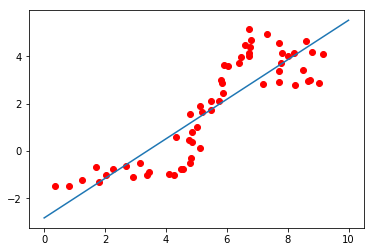

In [2]:
lr = ml.linear.linearRegress( Xtr, Ytr ); # create and train model
xs = np.linspace(0,10,2000); # densely sample possible x-values
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by our code)
ys = lr.predict( xs ); # make predictions at xs
print('theta =', lr.theta)

plt.plot(xs, ys)
plt.scatter(Xtr, Ytr, c='r')
plt.show()

(c)

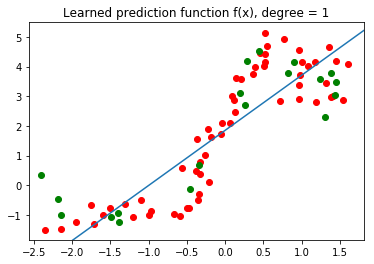

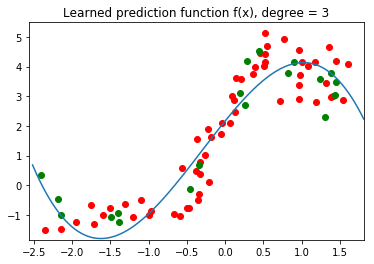

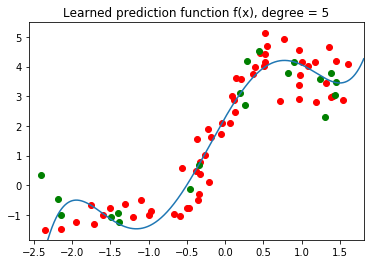

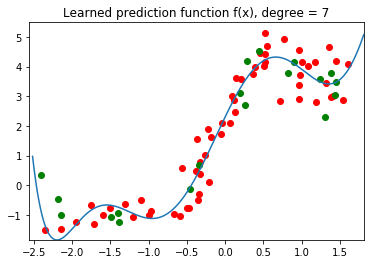

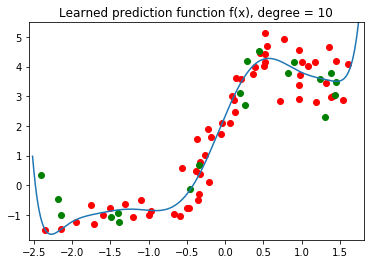

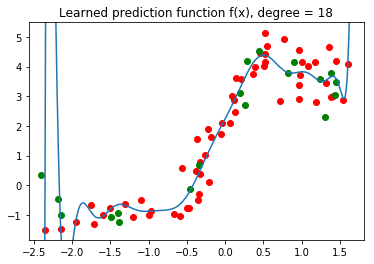

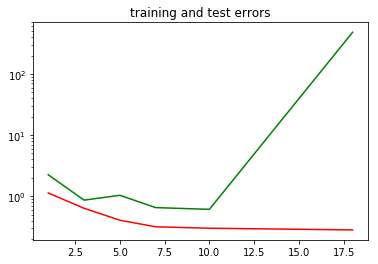

In [3]:
errTrain = []
errTest = []
degrees = [1,3,5,7,10,18]

for degree in degrees:      
    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False); 
    XtrP,params = ml.transforms.rescale(XtrP);
    XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte,degree,bias=False), params);
    
    lr = ml.linear.linearRegress( XtrP, Ytr )
    YhatTrain = lr.predict( XtrP ) 
    YhatTest = lr.predict( XteP ) 
    
    plt.scatter(XtrP[:,0], Ytr, c='r')
#     plt.scatter(XtrP[:,0], YhatTrain, c='b')
    ax = plt.axis()
#     plt.title('target values vs. prediction of train data set, degree = '+ str(int(degree)))
#     plt.show()
    plt.scatter(XteP[:,0], Yte, c='g')
#     plt.scatter(XteP[:,0], YhatTest, c='r')
#     plt.axis(ax)
#     plt.title('target values vs. prediction of test data set, degree = '+ str(int(degree)))
#     plt.show()
    
    xs = np.linspace(0,10,20000) # densely sample possible x-values
    xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by our code)
    xsP,_ = ml.transforms.rescale( ml.transforms.fpoly(xs,degree,bias=False), params)
    ys = lr.predict( xsP ) # make predictions at xs
    plt.plot(xsP[:,0], ys)
    plt.axis(ax)
    plt.title('Learned prediction function f(x), degree = '+ str(int(degree)))
    plt.show()
    
    counter = 0;
    mse = 0;
    for value in YhatTrain:
        mse += pow(value - Ytr[counter], 2)
        counter += 1
    errTrain.append(mse / counter)
    
    
    counter = 0;
    mse = 0;
    for value in YhatTest:
        mse += pow(value - Yte[counter], 2)
        counter += 1
    errTest.append(mse / counter)
    
# print(errTrain)
# print(errTest)
plt.semilogy(degrees, errTrain,'r')
plt.semilogy(degrees, errTest,'g')
plt.title('training and test errors')
plt.show()

## Problem 2: Cross-validation

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

data = np.genfromtxt("data/curve80.txt",delimiter=None) # load the text file
X = data[:,0]
X = X[:,np.newaxis] # code expects shape (M,N) so make sure it's 2-dimensional
Y = data[:,1] # doesn't matter for Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25

degrees = [1,3,5,7,10,18]
cv_mse = []

for degree in degrees:
      
    # (the linear regression learner will add the constant feature automatically)
    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False); 
    XtrP,params = ml.transforms.rescale(XtrP);
    
    XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte,degree,bias=False), params);
#     XteP,params = ml.transforms.rescale(XteP);
    
    lr = ml.linear.linearRegress( XtrP, Ytr )
    YhatTrain = lr.predict( XtrP ) # predict on training data
    YhatTest = lr.predict( XteP ) # predict on test data
    
    
    nFolds = 5
    J = []
    for iFold in range(nFolds):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold)

        XtiP = ml.transforms.fpoly(Xti, degree, bias=False); 
        XtiP,params = ml.transforms.rescale(XtiP);

        XviP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xvi,degree,bias=False), params);

        lr = ml.linear.linearRegress(XtiP, Yti)
        YhatValidation = lr.predict( XviP ) 
        
        counter = 0
        se = 0;
        for value in YhatValidation:
            se += pow(value - Yvi[counter], 2)
            counter += 1
        J.append(se / counter)
            
    cv_mse.append(np.mean(J))


(a)

In [5]:
print('5-fold cross-validation MSE of linear regression:')
counter = 0
for degree in degrees:
    print('degree =',degree,', MSE =', cv_mse[counter])
    counter += 1
       

5-fold cross-validation MSE of linear regression:
degree = 1 , MSE = 1.2118626629641984
degree = 3 , MSE = 0.742900575205166
degree = 5 , MSE = 0.5910703726406653
degree = 7 , MSE = 0.7335637831346694
degree = 10 , MSE = 0.7677056875881382
degree = 18 , MSE = 244153.66651105322


(b)

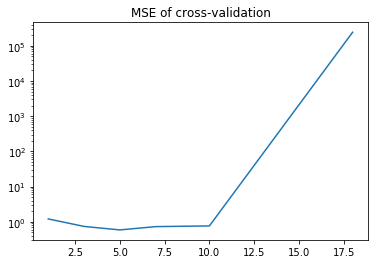

In [6]:
plt.semilogy(degrees, cv_mse)
plt.title('MSE of cross-validation')
plt.show()

(c) 

Hence, there is the minimum cross-validation when degree = 5

(d) 

If MSE evaluated on the actual test data, degree = 10 has the minimum error. We can notice that the curve is not similar to the curve of Model Complexity. 

If MSE evaluated from cross-validation, degree = 5 has the minimum error. The data set is not enough, hence k-fold cross validation can improve the accuracy of estimated performance.

Cross-validation has better effort on evaluating the model.